In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def calculate_2dft(input):
    ft = np.fft.ifftshift(input)
    ft = np.fft.fft2(ft)
    return np.fft.fftshift(ft)

def calculate_2dift(input):
    ift = np.fft.ifftshift(input)
    ift = np.fft.ifft2(ift)
    ift = np.fft.fftshift(ift)
    return ift.real

In [12]:
path1 = 'images.jpg'

image = cv2.imread(path1, 0)


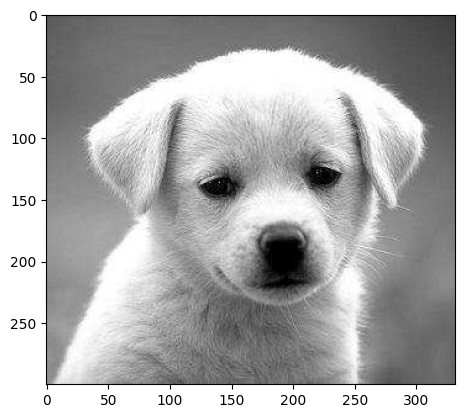

array([[ 87,  88,  88, ...,  60,  60,  60],
       [ 88,  88,  88, ...,  60,  60,  60],
       [ 88,  88,  89, ...,  60,  60,  60],
       ...,
       [145, 142, 144, ..., 102, 102, 102],
       [143, 142, 145, ..., 102, 102, 102],
       [143, 142, 147, ..., 102, 102, 102]], dtype=uint8)

In [13]:
plt.imshow(image, cmap='gray')
plt.show()
image


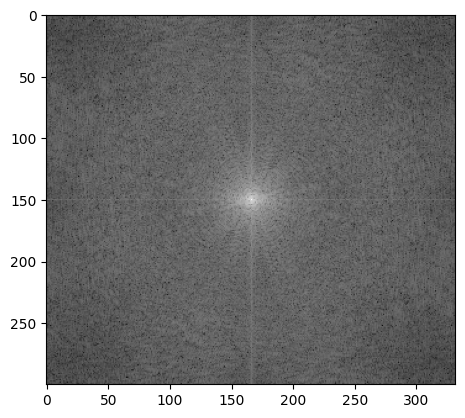

In [14]:
imageGray = image

# print(imageGray)

dft =  cv2.dft(np.float32(imageGray), flags=cv2.DFT_COMPLEX_OUTPUT)

dft_shift = np.fft.fftshift(dft)

# print(dft_shift)


mag, phase = cv2.cartToPolar(dft_shift[:,:,0], dft_shift[:,:, 1])


spec = np.log(mag)


plt.imshow(spec, cmap='gray')

# mag = cv2.pow(mag, 1.1)

1.0757762 25398974.0
[[ 87  88  88 ...  60  60  60]
 [ 88  88  88 ...  60  60  60]
 [ 88  88  89 ...  60  60  60]
 ...
 [145 142 144 ... 102 102 102]
 [143 142 145 ... 102 102 102]
 [143 142 147 ... 102 102 102]]
[[ 87  88  88 ...  60  60  60]
 [ 88  88  88 ...  60  60  60]
 [ 88  88  89 ...  60  60  60]
 ...
 [145 142 144 ... 102 102 102]
 [143 142 145 ... 102 102 102]
 [143 142 147 ... 102 102 102]]


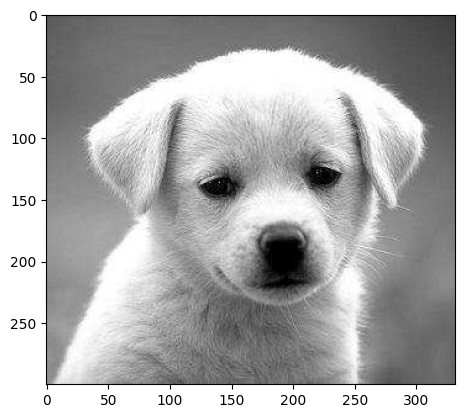

In [15]:
real, imag = cv2.polarToCart(mag, phase)

back = cv2.merge([real, imag])

back_shift = np.fft.ifftshift(back)

img_back = cv2.idft(back_shift)

img_back = cv2.magnitude(img_back[:,:,0], img_back[:,:,1])

min, max = np.amin(img_back, (0,1)), np.amax(img_back, (0,1))
print(min,max)

img_back = cv2.normalize(img_back, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)


# print(img_back)

plt.imshow(img_back, cmap='gray')

print(img_back)

print(imageGray)


(<Axes: >, <matplotlib.image.AxesImage at 0x262251451f0>)

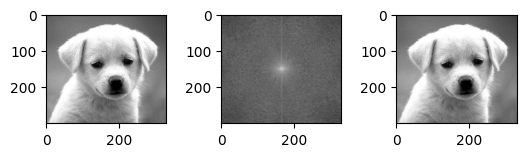

In [16]:
q = plt.figure(3)



plt.subplot(331),plt.imshow(imageGray, cmap='gray')
plt.subplot(332), plt.imshow(spec, cmap='gray')
plt.subplot(333), plt.imshow(img_back, cmap='gray')


In [8]:
a = np.fft.fft2(imageGray)


print(imageGray)

print(a)
print(a.shape)


def normalize(arr, t_min, t_max):
    norm_arr = []
    diff = t_max - t_min
    diff_arr = max(arr) - min(arr)    
    for i in arr:
        temp = (((i - min(arr))*diff)/diff_arr) + t_min
        norm_arr.append(temp)
    return norm_arr


b = np.fft.ifft2(a, norm='forward')







print(b)

[[169 169 168 ... 175 162 138]
 [169 169 168 ... 175 162 138]
 [169 169 168 ... 175 162 138]
 ...
 [ 53  53  59 ... 115 112 114]
 [ 53  53  64 ... 117 118 122]
 [ 53  53  64 ... 117 118 122]]
[[ 3.47150210e+07      +0.j         -4.56574842e+05+2164544.56601674j
   1.52208185e+06-1188744.34545086j ... -2.74594442e+05 -541856.23885154j
   1.52208185e+06+1188744.34545086j -4.56574842e+05-2164544.56601674j]
 [ 3.03060258e+04-1254352.11868502j -1.65318041e+06+1443256.09933483j
  -1.03047308e+06 +295625.94086566j ...  5.81429005e+05 +694299.50189837j
  -3.23146799e+05 +530172.14398945j  8.28827982e+04 +747288.29705214j]
 [-3.71339693e+05 -259159.6100419j  -2.73455353e+05  -96560.84121478j
   5.98253549e+05 -417384.05377513j ...  3.25457890e+05 +837215.92343231j
  -6.41543938e+05 -139288.98145975j  7.12638499e+05  -45587.21465757j]
 ...
 [ 5.03855090e+05 -170439.65910213j  6.80178798e+05 +661056.25759734j
  -4.51446673e+05 -196345.92584117j ...  9.43802904e+05 +134035.4765524j
   1.56184977e+